<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-09-10 20:21:44--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  63.8MB/s    in 2.4s    

2025-09-10 20:21:46 (63.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


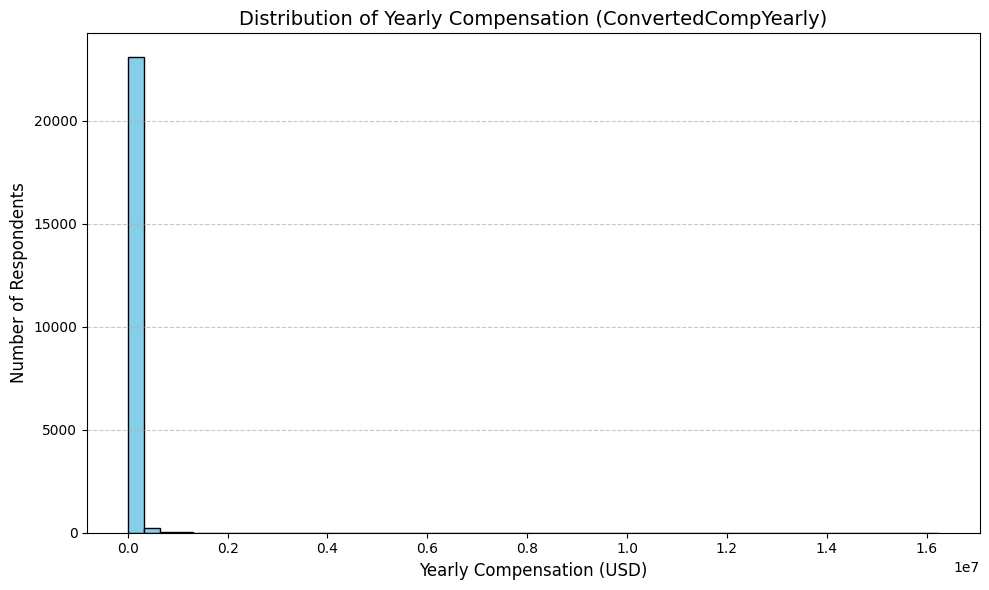

In [4]:
# Drop missing values
comp_data = df['ConvertedCompYearly'].dropna()

# Optional: Check basic statistics
print(comp_data.describe())

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(comp_data, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Yearly Compensation (ConvertedCompYearly)", fontsize=14)
plt.xlabel("Yearly Compensation (USD)", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



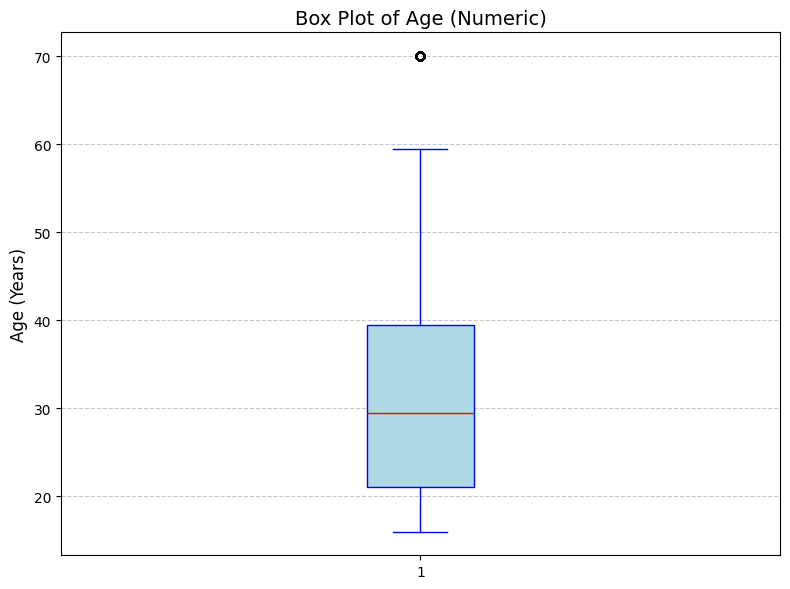

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Define mapping from age group to numeric midpoint
age_mapping = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}

# Create a numeric Age column
df['AgeNumeric'] = df['Age'].map(age_mapping)

plt.figure(figsize=(8,6))
plt.boxplot(df['AgeNumeric'].dropna(), patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'))
plt.title("Box Plot of Age (Numeric)", fontsize=14)
plt.ylabel("Age (Years)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



         AgeNumeric  ConvertedCompYearly
count  23426.000000         2.342600e+04
mean      34.207761         8.613250e+04
std        9.901590         1.867864e+05
min       16.000000         1.000000e+00
25%       29.500000         3.271200e+04
50%       29.500000         6.500000e+04
75%       39.500000         1.079370e+05
max       70.000000         1.625660e+07


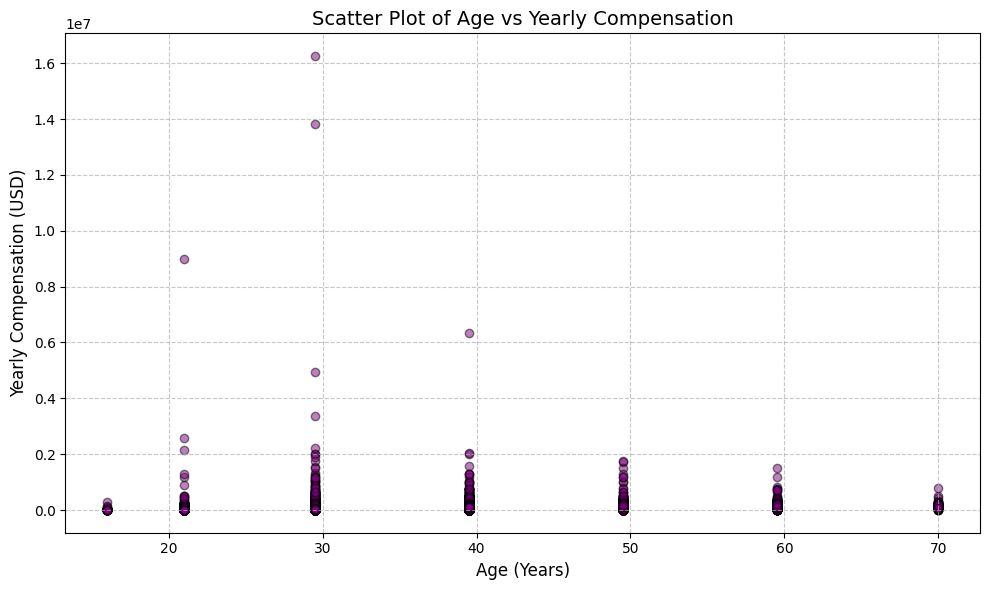

In [7]:
# Drop rows with missing age or compensation
df_scatter = df.dropna(subset=["AgeNumeric", "ConvertedCompYearly"]).copy()

# Optional: Inspect data
print(df_scatter[['AgeNumeric', 'ConvertedCompYearly']].describe())

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df_scatter['AgeNumeric'], df_scatter['ConvertedCompYearly'],
            alpha=0.5, color='purple', edgecolor='k')
plt.title("Scatter Plot of Age vs Yearly Compensation", fontsize=14)
plt.xlabel("Age (Years)", fontsize=12)
plt.ylabel("Yearly Compensation (USD)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


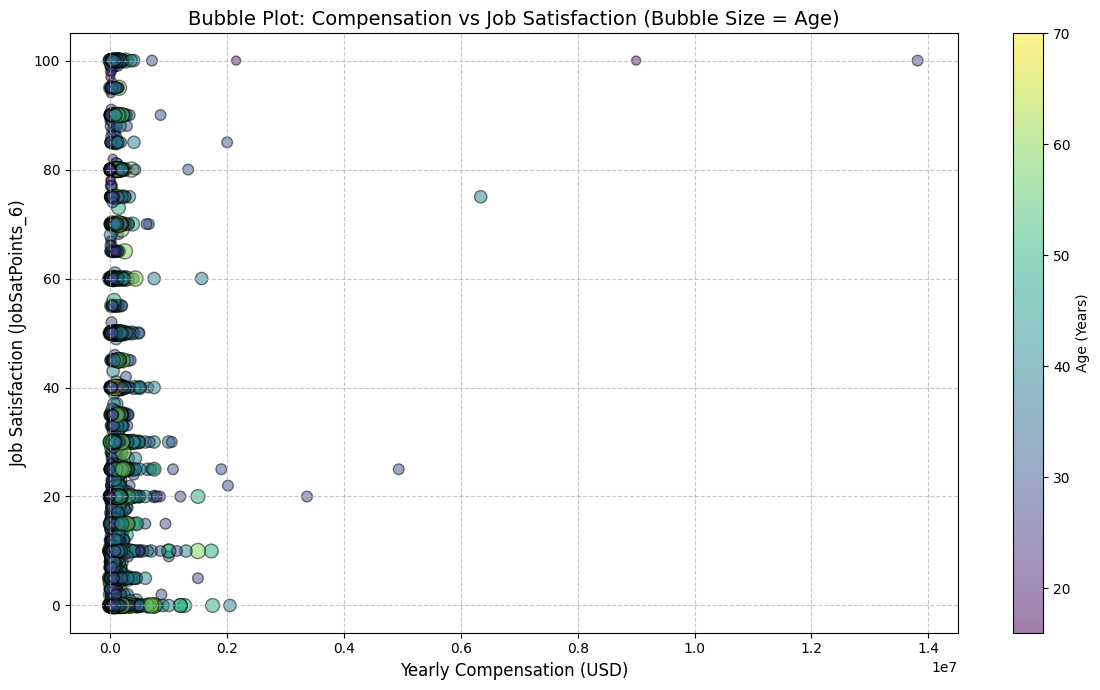

In [8]:
# Drop rows with missing values in relevant columns
df_bubble = df.dropna(subset=["ConvertedCompYearly", "JobSatPoints_6", "AgeNumeric"]).copy()

# Optional: Inspect data
df_bubble[['ConvertedCompYearly', 'JobSatPoints_6', 'AgeNumeric']].describe()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))
scatter = plt.scatter(
    df_bubble['ConvertedCompYearly'],
    df_bubble['JobSatPoints_6'],
    s=df_bubble['AgeNumeric']*2,  # scale bubble size
    alpha=0.5,
    c=df_bubble['AgeNumeric'],     # color by age for extra info
    cmap='viridis',
    edgecolor='k'
)

plt.title("Bubble Plot: Compensation vs Job Satisfaction (Bubble Size = Age)", fontsize=14)
plt.xlabel("Yearly Compensation (USD)", fontsize=12)
plt.ylabel("Job Satisfaction (JobSatPoints_6)", fontsize=12)
plt.colorbar(scatter, label='Age (Years)')  # show color scale for age
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



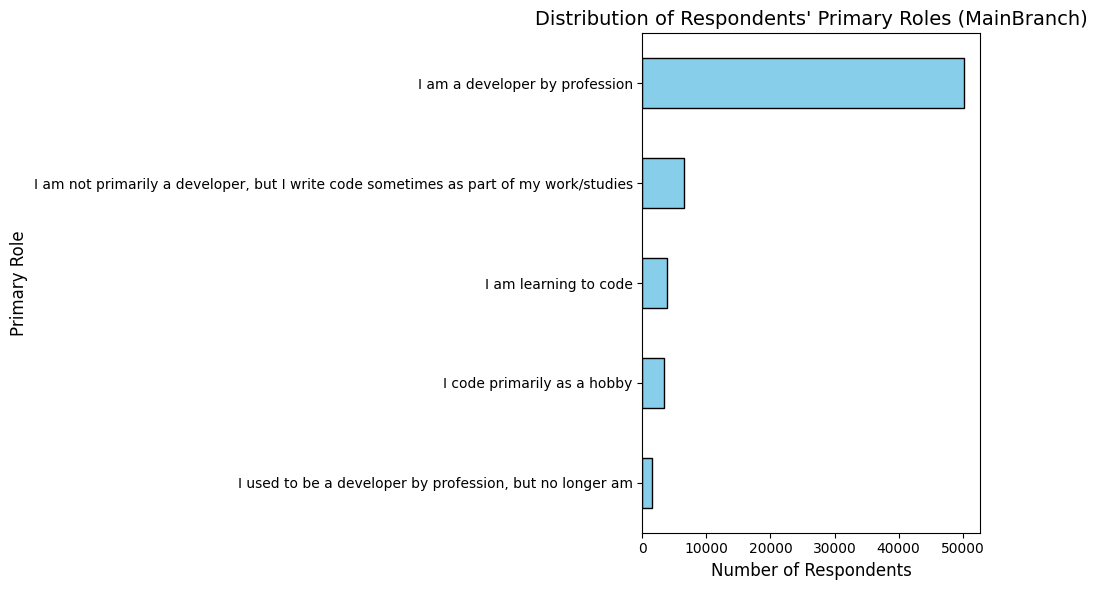

In [9]:
# Drop missing values in MainBranch
df_main = df.dropna(subset=["MainBranch"]).copy()

# Count respondents per primary role
main_counts = df_main["MainBranch"].value_counts()

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
main_counts.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("Distribution of Respondents' Primary Roles (MainBranch)", fontsize=14)
plt.xlabel("Number of Respondents", fontsize=12)
plt.ylabel("Primary Role", fontsize=12)
plt.gca().invert_yaxis()  # largest bar on top
plt.tight_layout()
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



Language
Python        25047
JavaScript    23774
SQL           22400
HTML/CSS      20721
TypeScript    20239
Name: count, dtype: int64


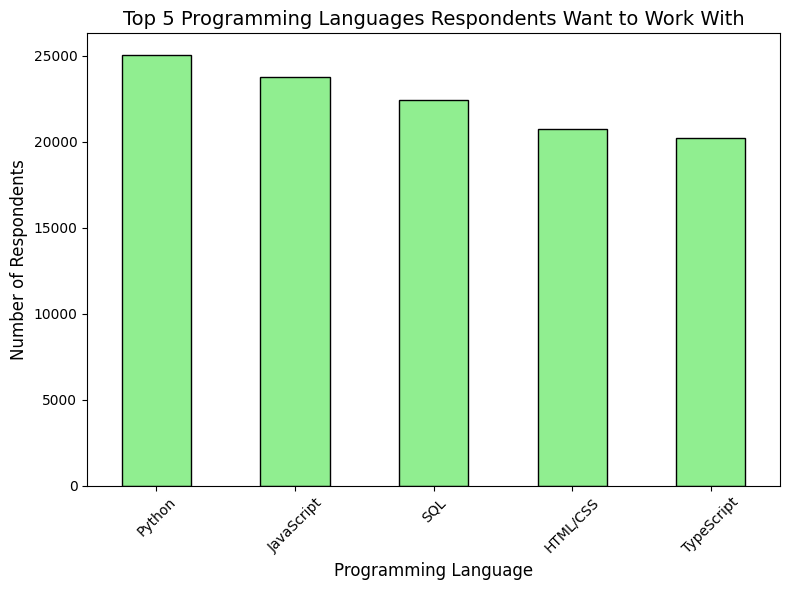

In [10]:
# Drop missing values
df_lang = df.dropna(subset=["LanguageWantToWorkWith"]).copy()

# Split multiple languages into separate rows
df_lang = df_lang.assign(Language=df_lang["LanguageWantToWorkWith"].str.split(";"))
df_lang = df_lang.explode("Language")

# Clean whitespace
df_lang["Language"] = df_lang["Language"].str.strip()

# Count languages and get top 5
top_languages = df_lang["Language"].value_counts().head(5)
print(top_languages)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
top_languages.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Top 5 Programming Languages Respondents Want to Work With", fontsize=14)
plt.xlabel("Programming Language", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


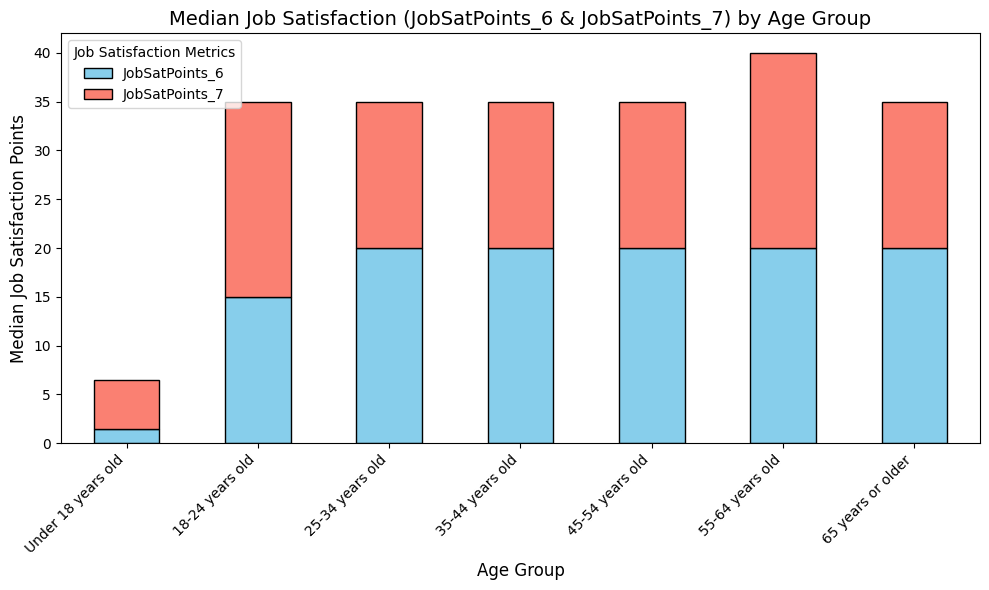

In [11]:
# Drop rows with missing job satisfaction or age
df_jobsat = df.dropna(subset=["Age", "JobSatPoints_6", "JobSatPoints_7"]).copy()

# Group by Age and calculate median job satisfaction points
jobsat_median = df_jobsat.groupby("Age")[["JobSatPoints_6", "JobSatPoints_7"]].median()

# Optional: reorder age groups
age_order = ["Under 18 years old", "18-24 years old", "25-34 years old",
             "35-44 years old", "45-54 years old", "55-64 years old", "65 years or older"]
jobsat_median = jobsat_median.reindex(age_order)
import matplotlib.pyplot as plt

jobsat_median.plot(kind='bar', stacked=True, figsize=(10,6), color=['skyblue', 'salmon'], edgecolor='black')
plt.title("Median Job Satisfaction (JobSatPoints_6 & JobSatPoints_7) by Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Median Job Satisfaction Points", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(["JobSatPoints_6", "JobSatPoints_7"], title="Job Satisfaction Metrics")
plt.tight_layout()
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



Database
PostgreSQL              25536
MySQL                   21099
SQLite                  17365
Microsoft SQL Server    13275
MongoDB                 13007
Redis                   10463
MariaDB                  8991
Elasticsearch            6533
Oracle                   5273
Dynamodb                 4138
Name: count, dtype: int64


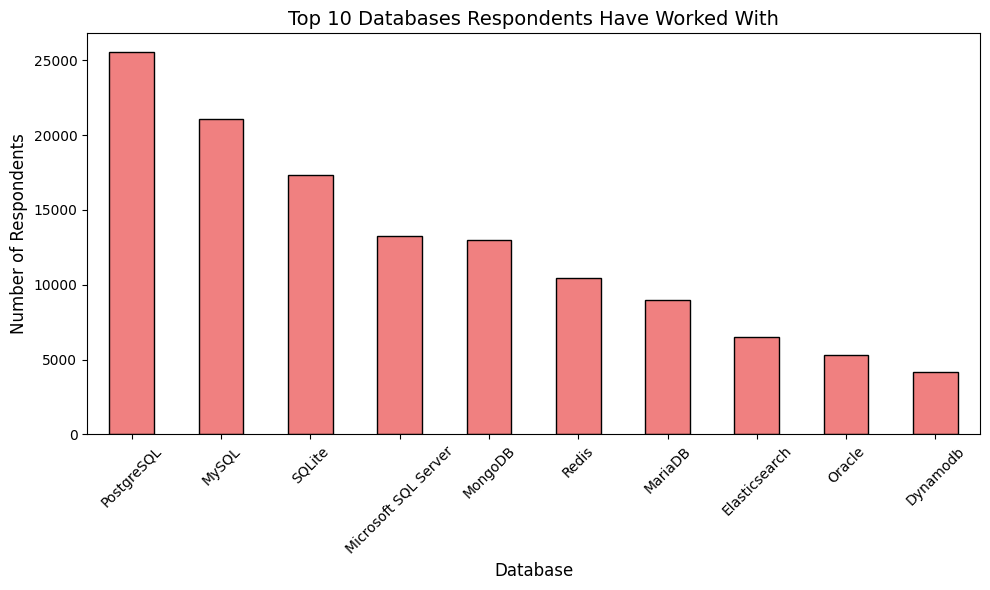

In [12]:
# Drop missing values
df_db = df.dropna(subset=["DatabaseHaveWorkedWith"]).copy()

# Split multiple databases into separate rows
df_db = df_db.assign(Database=df_db["DatabaseHaveWorkedWith"].str.split(";"))
df_db = df_db.explode("Database")

# Clean whitespace
df_db["Database"] = df_db["Database"].str.strip()

# Count databases
db_counts = df_db["Database"].value_counts()
print(db_counts.head(10))  # Optional: show top 10

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
db_counts.head(10).plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Top 10 Databases Respondents Have Worked With", fontsize=14)
plt.xlabel("Database", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



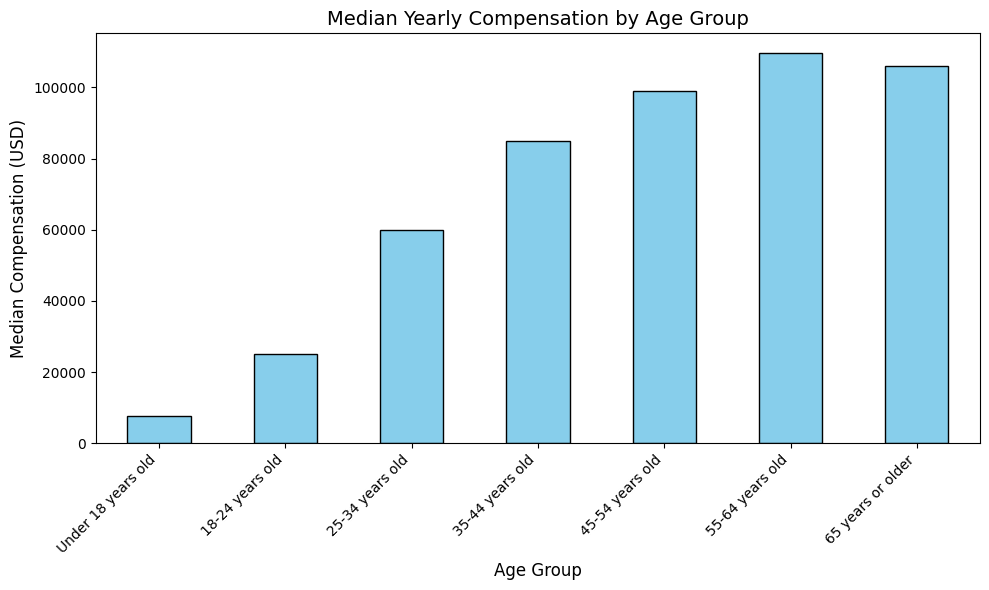

In [13]:
# Drop missing values for compensation and age
df_comp = df.dropna(subset=["Age", "ConvertedCompYearly"]).copy()

# Group by Age and calculate median compensation
median_comp = df_comp.groupby("Age")["ConvertedCompYearly"].median()

# Reorder age groups for logical display
age_order = ["Under 18 years old", "18-24 years old", "25-34 years old",
             "35-44 years old", "45-54 years old", "55-64 years old", "65 years or older"]
median_comp = median_comp.reindex(age_order)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
median_comp.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Median Yearly Compensation by Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Median Compensation (USD)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
France                                                   2110
Canada                                                   2104
Poland                                                   1534
Netherlands                                              1449
Brazil                                                   1375
Name: count, dtype: int64


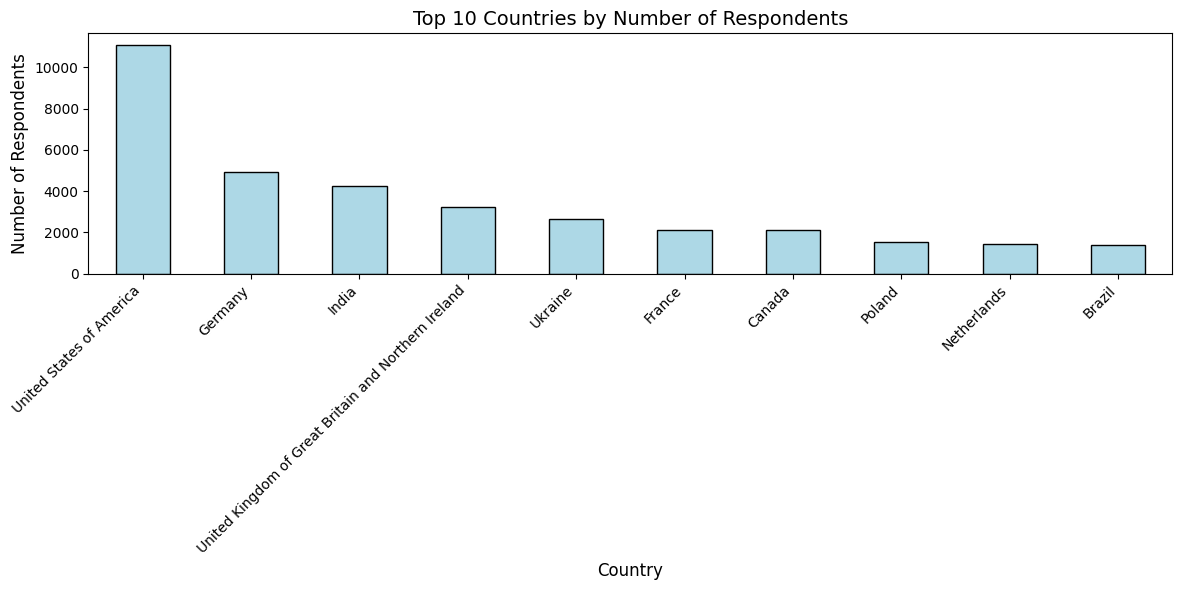

In [14]:
# Drop missing values in Country
df_country = df.dropna(subset=["Country"]).copy()

# Count respondents per country
country_counts = df_country["Country"].value_counts()

# Optional: show top 10 countries
print(country_counts.head(10))
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
country_counts.head(10).plot(kind='bar', color='lightblue', edgecolor='black')
plt.title("Top 10 Countries by Number of Respondents", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
